In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')  # Using Agg backend for matplotlib if using full matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Scikit-learn libraries for predictive analysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.inspection import permutation_importance

# Set plot aesthetics
sns.set(style='whitegrid')

# For reproducibility of results
np.random.seed(42)

In [2]:
import pandas as pd
# Load data from the CSV file
file_path = r"Mall_Customers_Enhanced.csv"

try:
    df = pd.read_csv(file_path, encoding='utf-8')
    print("Data loaded successfully!")
except Exception as e:
    
    # If there is an error here, double-check the file path, delimiter, or encoding settings
    
    print("Error loading data:", e)
    
# Display the first few rows of the dataframe
df.head()

Data loaded successfully!


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group,Estimated Savings (k$),Credit Score,Loyalty Years,Preferred Category
0,1,Male,19,15,39,18-25,11.10,456,3,Budget
1,2,Male,21,15,81,18-25,6.90,300,6,Luxury
2,3,Female,20,16,6,18-25,15.36,594,2,Budget
3,4,Female,23,16,77,18-25,7.79,300,6,Luxury
4,5,Female,31,17,40,26-35,12.47,480,5,Budget


In [3]:

print('Dataset shape:', df.shape)
print('\nData types:')
print(df.dtypes)


print('\nMissing values in each column:')
print(df.isnull().sum())

Dataset shape: (200, 10)

Data types:
CustomerID                  int64
Gender                     object
Age                         int64
Annual Income (k$)          int64
Spending Score (1-100)      int64
Age Group                  object
Estimated Savings (k$)    float64
Credit Score                int64
Loyalty Years               int64
Preferred Category         object
dtype: object

Missing values in each column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Age Group                 4
Estimated Savings (k$)    0
Credit Score              0
Loyalty Years             0
Preferred Category        0
dtype: int64


In [4]:

duplicates = df.duplicated().sum()
print('Number of duplicate records:', duplicates)



# Display summary statistics for numeric columns
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.describe()

Number of duplicate records: 0


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Estimated Savings (k$),Credit Score,Loyalty Years
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,40.247950,743.680000,5.930000
std,57.879185,13.969007,26.264721,25.823522,21.333448,155.176727,1.570808
min,1.000000,18.000000,15.000000,1.000000,6.460000,300.000000,2.000000
25%,50.750000,28.750000,41.500000,34.750000,28.800000,697.000000,5.000000
50%,100.500000,36.000000,61.500000,50.000000,36.410000,833.000000,6.000000
75%,150.250000,49.000000,78.000000,73.000000,44.967500,850.000000,7.000000
max,200.000000,70.000000,137.000000,99.000000,120.560000,850.000000,9.000000


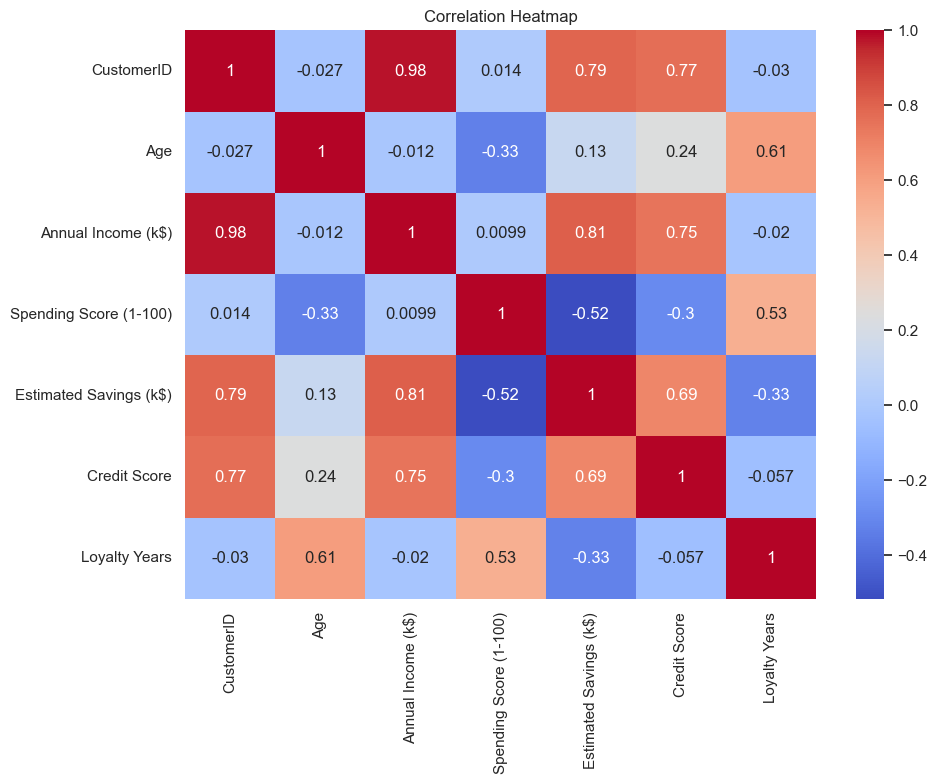

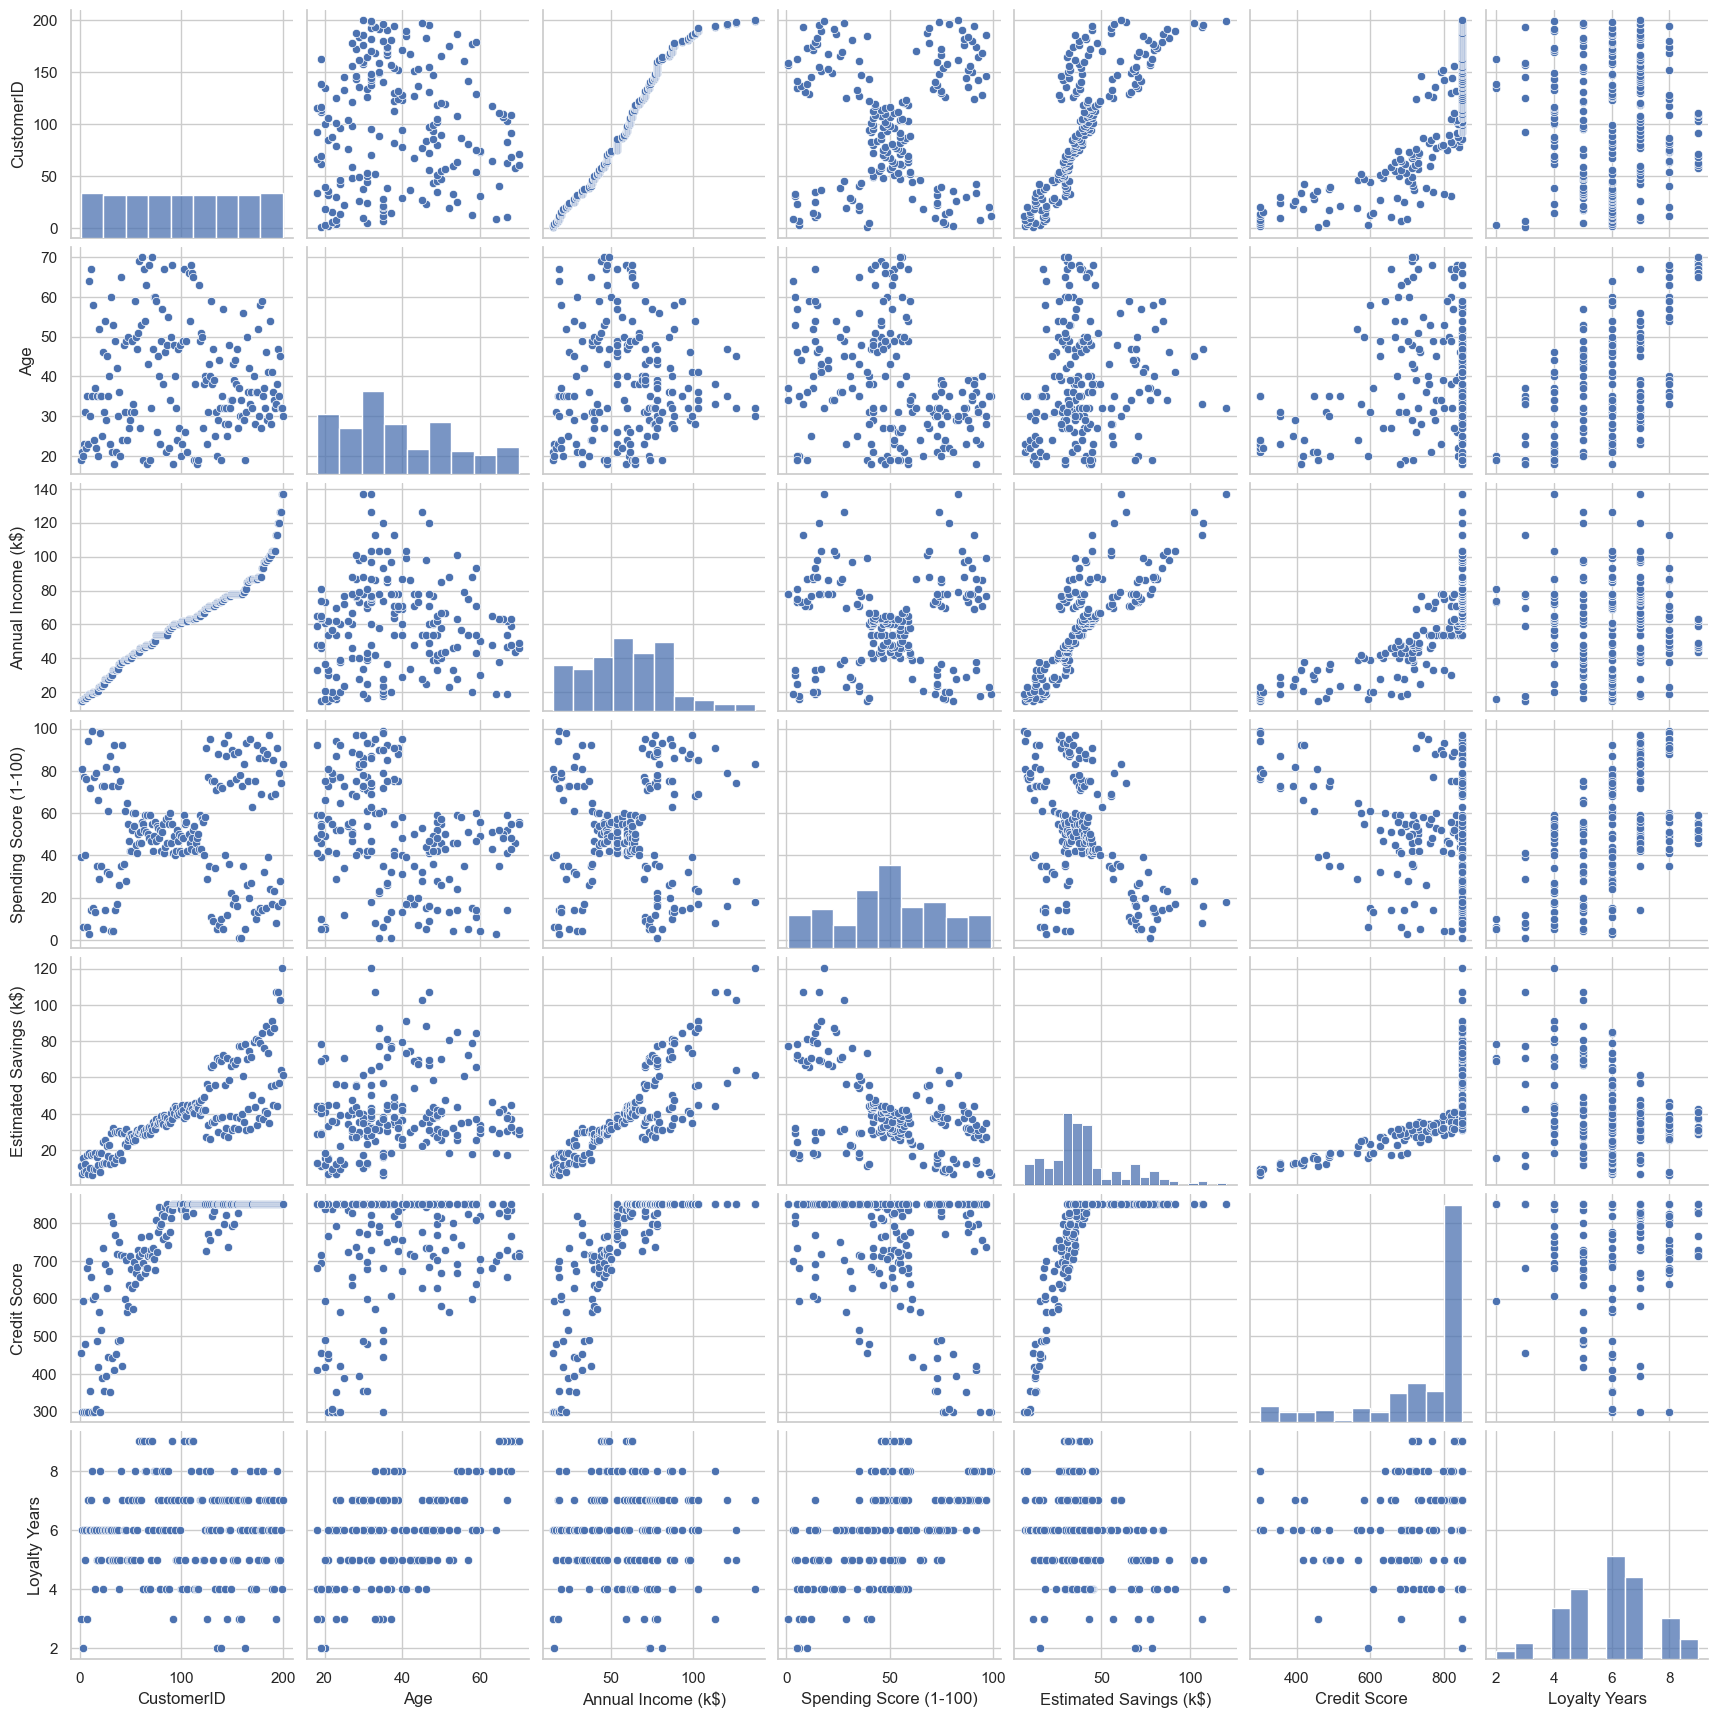

In [5]:

### Correlation Heatmap
# Ensure we use only numeric columns for the correlation analysis
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns for correlation heatmap')

### Pair Plot
# Visualizing pairwise relationships among numeric features
sns.pairplot(numeric_df)
plt.show()


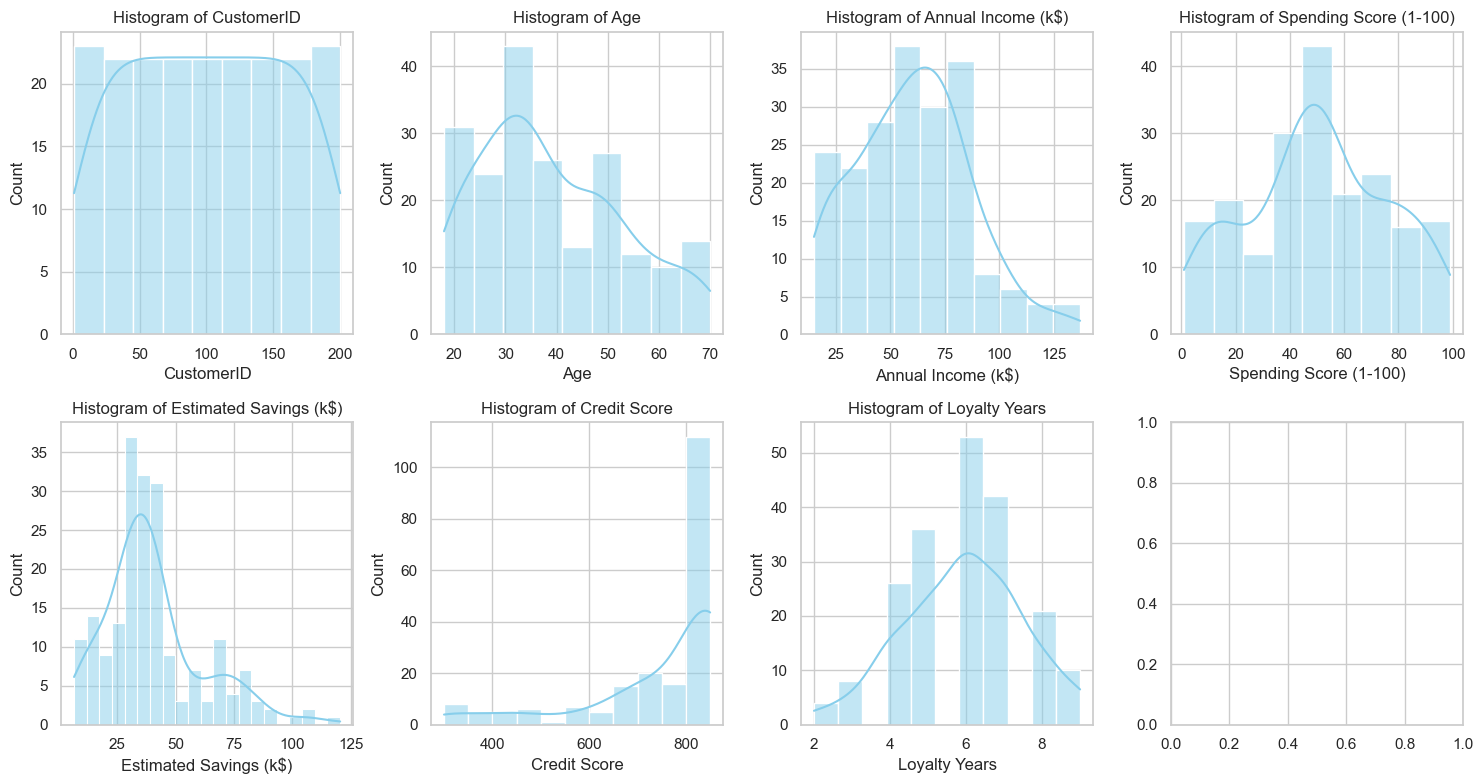

In [6]:
### Histograms
# Plot histograms for the numeric variables
numeric_columns = numeric_df.columns
fig, axes = plt.subplots(nrows=2, ncols=int(np.ceil(len(numeric_columns)/2)), figsize=(15, 8))
axes = axes.flatten()
for idx, col in enumerate(numeric_columns):
    sns.histplot(data=df, x=col, kde=True, ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

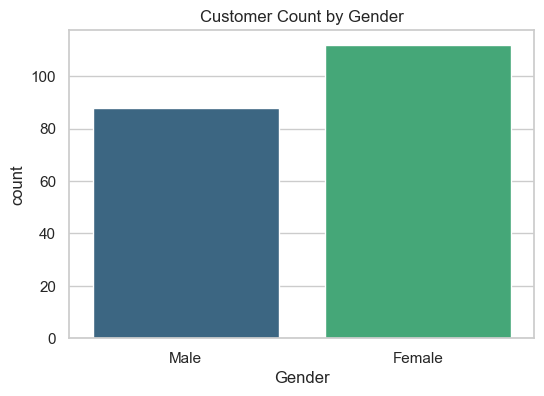

In [7]:
### Count Plot for Gender
# Visualize the count of customers by Gender
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', palette='viridis')
plt.title('Customer Count by Gender')
plt.show()

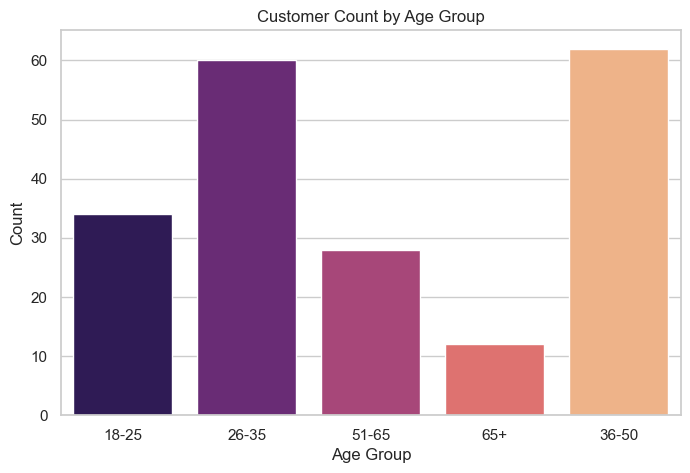

In [8]:
### Bar Plot for Age Group
# Visualize the number of customers in each age group
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Age Group', y=df.groupby('Age Group')['CustomerID'].transform('count'),
            palette='magma')
plt.title('Customer Count by Age Group')
plt.ylabel('Count')
plt.show()


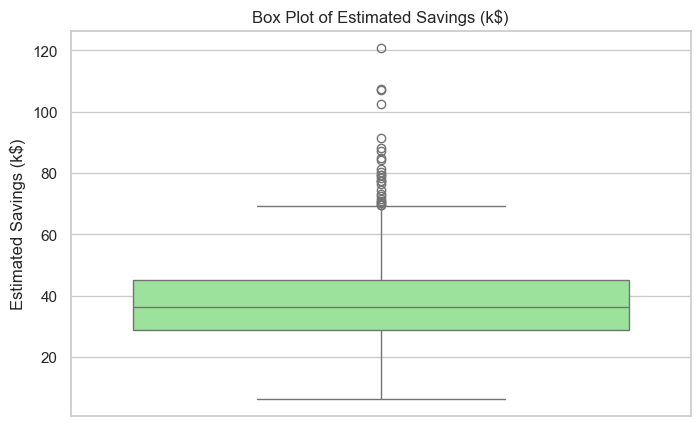

In [9]:

### Box Plot for Estimated Savings
# Show distribution of Estimated Savings
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y='Estimated Savings (k$)', color='lightgreen')
plt.title('Box Plot of Estimated Savings (k$)')
plt.show()

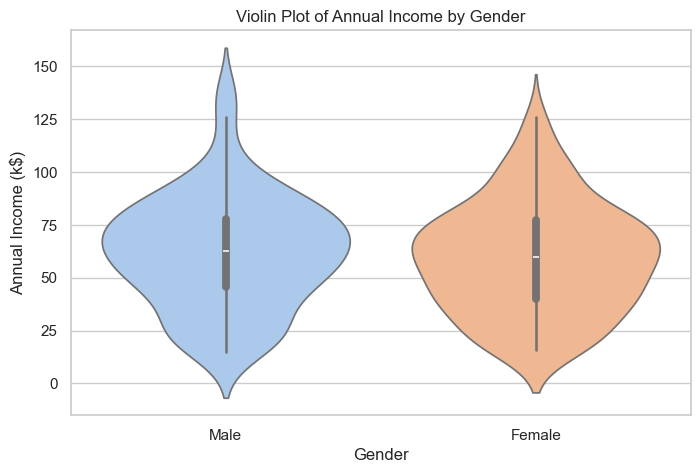

In [10]:
### Violin Plot for Annual Income
# Comparing Annual Income distributions by Gender
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='Gender', y='Annual Income (k$)', palette='pastel')
plt.title('Violin Plot of Annual Income by Gender')
plt.show()

Prediction Accuracy: 0.95


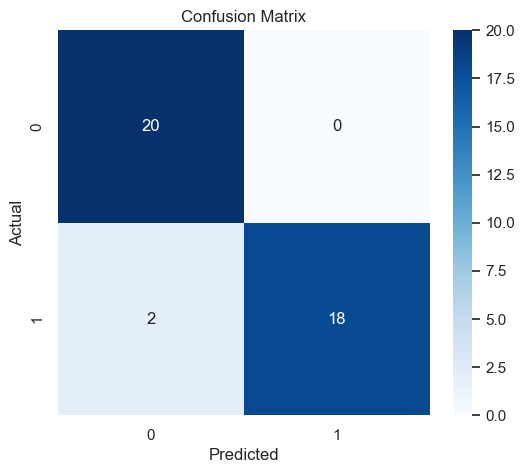

In [11]:

# Create a new binary column 'HighSpender'
df['HighSpender'] = (df['Spending Score (1-100)'] >= 50).astype(int)

# Select features and target for predictive modeling
# We will drop columns that are identifiers or less likely to be helpful directly
features = ['Age', 'Annual Income (k$)', 'Estimated Savings (k$)', 'Credit Score', 'Loyalty Years']
X = df[features]
y = df['HighSpender']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate prediction accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Prediction Accuracy: {accuracy:.2f}')

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


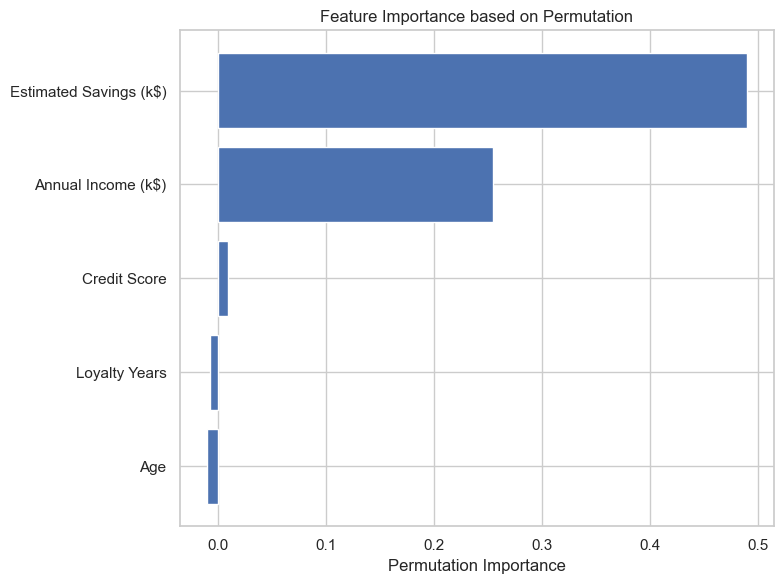

In [12]:
# Compute permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Plot permutation importance
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(8, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(features)[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance based on Permutation')
plt.tight_layout()
plt.show()